<a href="https://colab.research.google.com/github/Manish-k723/100-days-of-ML/blob/main/Day_53_Gradient_regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.model_selection import train_test_split as tts

In [45]:
X, y = make_regression(n_samples = 100, n_features = 1, n_targets = 1, n_informative = 1, noise = 30, random_state = 42)

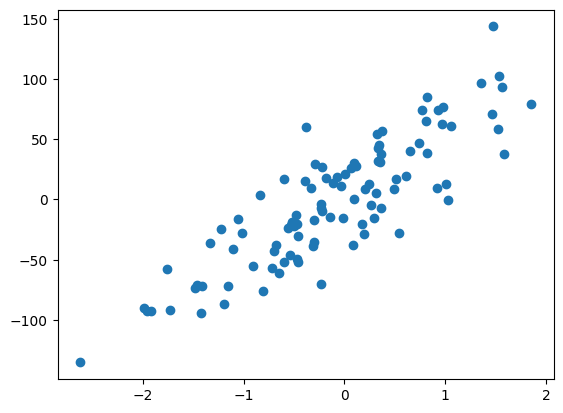

In [46]:
plt.scatter(X,y)

In [50]:
X_train, X_test, y_train, y_test = tts(X,y, test_size = 0.2, random_state = 42)

In [51]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
model.coef_, model.intercept_

(array([49.25034584]), 0.2976666426776342)

In [52]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(model, X_test, y_test, scoring='r2', cv = 5))

0.023633983891282927

In [53]:
class gbregressor():
  def __init__(self, learning_rate, epochs):
    self.b = 0
    self.m = 100
    self.lr = learning_rate
    self.epochs = epochs

  def fit(self, X, y):
    for i in range(self.epochs):
      loss_slope_b = -2*np.sum(y- (self.m*X.ravel())-self.b)
      loss_slope_m = -2*np.sum((y- (self.m*X.ravel())-self.b)*X.ravel())
      self.b = self.b-self.lr*loss_slope_b
      self.m = self.m-self.lr*loss_slope_m
    print(self.m,self.b)

  def predict(self,X):
    return self.m*X+self.b
    

In [54]:
gd = gbregressor(0.001, 60)

In [55]:
gd.fit(X,y)

49.83086175207917 3.496054244006766


In [56]:
from sklearn.metrics import r2_score

In [57]:
r2_score(gd.predict(X_test), y_test)

0.5731015877303112

In [58]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [ ]:
b = -520
m = 600
lr = 0.001
all_b = []
all_m = []
all_cost = []

epochs = 30

for i in range(epochs):
    slope_b = 0
    slope_m = 0
    cost = 0
    for j in range(X.shape[0]):
        slope_b = slope_b - 2*(y[j] - (m * X[j]) -  b)
        slope_m = slope_m - 2*(y[j] - (m * X[j]) -  b)*X[j]
        cost = cost + (y[j] - m * X[j] -b) ** 2

    b = b - (lr * slope_b)
    m = m - (lr * slope_m)
    all_b.append(b)
    all_m.append(m)
    all_cost.append(cost)

In [ ]:
fig, ax = plt.subplots(figsize=(9,5))
#fig.set_tight_layout(True)

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*(-27) -150
ax.scatter(X, y)
line, = ax.plot(x_i, x_i*50 - 4, 'r-', linewidth=2)

def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*all_m[i] + all_b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=epochs, interval=500)

In [ ]:
# Cost function
# creating a blank window 
# for the animation 
num_epochs = list(range(0,30))
fig = plt.figure(figsize=(9,5)) 
axis = plt.axes(xlim =(0, 31), ylim =(0, 4500000)) 
  
line, = axis.plot([], [], lw = 2) 
  
xdata, ydata = [], [] 
  
# animation function 
def animate(i): 
    label = 'epoch {0}'.format(i + 1)
    xdata.append(num_epochs[i]) 
    ydata.append(all_cost[i]) 
    line.set_data(xdata, ydata) 
    axis.set_xlabel(label)
      
    return line, 
  
# calling the animation function     
anim = animation.FuncAnimation(fig, animate, frames = 30,repeat=False, interval = 500)

f = r"animation5.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)

In [ ]:
# intercept graph
num_epochs = list(range(0,30))
fig = plt.figure(figsize=(9,5)) 
axis = plt.axes(xlim =(0, 31), ylim =(-10, 160)) 
  
line, = axis.plot([], [], lw = 2) 
  
xdata, ydata = [], [] 
  
# animation function 
def animate(i): 
    label = 'epoch {0}'.format(i + 1)
    xdata.append(num_epochs[i]) 
    ydata.append(all_b[i]) 
    line.set_data(xdata, ydata) 
    axis.set_xlabel(label)
      
    return line, 
  
# calling the animation function     
anim = animation.FuncAnimation(fig, animate, frames = 30,repeat=False, interval = 500)

f = r"animation6.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)


In [ ]:
# intercept graph
num_epochs = list(range(0,30))
fig = plt.figure(figsize=(9,5)) 
axis = plt.axes(xlim =(0, 31), ylim =(-150, 50)) 
  
line, = axis.plot([], [], lw = 2) 
  
xdata, ydata = [], [] 
  
# animation function 
def animate(i): 
    label = 'epoch {0}'.format(i + 1)
    xdata.append(num_epochs[i]) 
    ydata.append(all_m[i]) 
    line.set_data(xdata, ydata) 
    axis.set_xlabel(label)
      
    return line, 
  
# calling the animation function     
anim = animation.FuncAnimation(fig, animate, frames = 30,repeat=False, interval = 500)

f = r"animation7.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)